<a href="https://colab.research.google.com/github/gorzanskik-ai/machine-learning/blob/main/supervised-learning/05_projects/01_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

sns.set(font_scale=1.3)
np.random.seed(42)

In [27]:
from sklearn.datasets import load_digits

data = load_digits()
X = data['images']
y = data['target']

target_names = data['target_names']

In [28]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (1797, 8, 8)
y shape: (1797,)


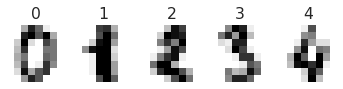

In [29]:
plt.figure(figsize=(12, 10))
for i in range(1, 6):
    plt.subplot(1, 10, i)
    plt.imshow(X[i-1], cmap='gray_r')
    plt.axis('off')
    plt.title(y[i-1])

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

#wypłaszczenie obrazów

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (1347, 8, 8)
X_test shape: (450, 8, 8)
y_train shape: (1347,)
y_test shape: (450,)
X_train shape: (1347, 64)
X_test shape: (450, 64)


In [31]:
x = np.array([[1, 2, 3], [4, 5, 6]])
x.reshape(1, -1)

array([[1, 2, 3, 4, 5, 6]])

Support Vector Machine - 'linear'

In [32]:
from sklearn.svm import SVC

classifier = SVC(gamma=0.001, kernel='linear')
classifier.fit(X_train, y_train)

SVC(gamma=0.001, kernel='linear')

In [33]:
classifier.score(X_test, y_test)

0.9822222222222222

Support Vector Machine - 'rbf'

In [34]:
classifier = SVC(gamma=0.001, kernel='rbf')
classifier.fit(X_train, y_train)

SVC(gamma=0.001)

In [35]:
classifier.score(X_test, y_test)

0.9888888888888889

Ocena modelu

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        55
           5       0.97      1.00      0.98        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       0.97      1.00      0.99        38
           9       0.98      0.96      0.97        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [38]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

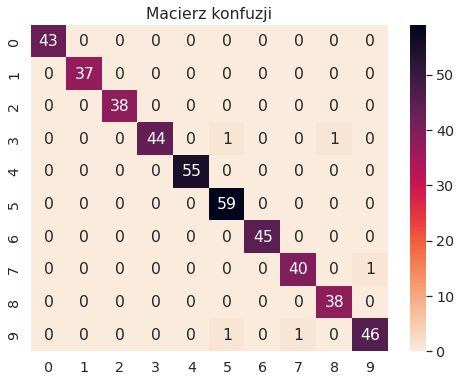

In [39]:
plt.figure(figsize=(8, 6))
plt.title('Macierz konfuzji')
_ = sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [41]:
import plotly.figure_factory as ff

columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):
    # Mulitclass classification, 3 classes
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [42]:
df = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
df.head()

,y_true,y_pred
0,6,6
1,9,9
2,3,3
3,7,7
4,2,2


In [51]:
miss = df[df['y_true'] != df['y_pred']]
indexes = miss.index
miss_images = X_test[indexes]

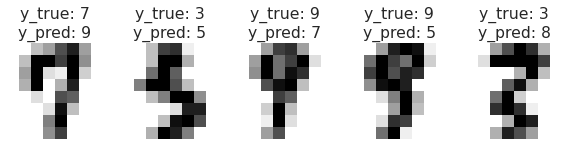

In [65]:
plt.figure(figsize=(12, 10))
for i in range(1, 6):
    plt.subplot(1, 6, i)
    plt.imshow(miss_images[i-1].reshape(8, 8), cmap='gray_r')
    plt.axis('off')
    plt.title(f"y_true: {miss['y_true'].iloc[i-1]}\ny_pred: {miss['y_pred'].iloc[i-1]}")